___
<h1 style="color:blue;">LASSO REGRESSION</h1>

___


## Introduction to Lasso Regression

Lasso Regression, or Least Absolute Shrinkage and Selection Operator, is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. Lasso regression performs both variable selection and regularization to enhance the prediction accuracy and interpretability of the statistical model it produces.

### Key Concepts

- **Dependent Variable (Y):** The variable we are trying to predict or explain.
- **Independent Variables (X1, X2, ..., Xn):** The variables that are used to predict the dependent variable.
- **Lasso Coefficient:** The penalty term added to the regression equation to control the complexity of the model and prevent overfitting.
- **Regularization Parameter (λ):** Controls the strength of the penalty term, with higher values leading to more shrinkage.

### The Lasso Regression Equation
The equation for Lasso regression is:

Y = β0 + β1X1 + β2X2 + ... + βnXn + λΣ|βi|

Where:
- Y is the dependent variable.
- β0 is the intercept.
- β1, β2, ..., βn are the coefficients of the independent variables.
- X1, X2, ..., Xn are the independent variables.
- λ is the regularization parameter.
- Σ|βi| is the sum of the absolute values of the coefficients.
- The goal is to minimize the residual sum of squares (RSS) and the sum of the absolute values of the coefficients.
- Lasso regression can shrink some coefficients to zero, effectively performing variable selection.
- Lasso regression is particularly useful when dealing with high-dimensional data with many features.
- Lasso regression can help prevent overfitting by penalizing large coefficients.
  
### Assumptions of Lasso Regression
- **Linearity**: The relationship between the dependent and independent variables is linear.
- **Independence**: Observations are independent of each other.
- **Homoscedasticity**: Constant variance of the error terms.
- **Normality**: The error terms are normally distributed.
- **Multicollinearity**: Lasso regression can handle multicollinearity by performing variable selection.

### Applications
Lasso Regression is widely used in various fields such as:
- **Economics**: To predict economic indicators like GDP, inflation rates, etc.
- **Finance**: To predict stock prices, credit scoring, etc.
- **Marketing**: To analyze the effectiveness of marketing campaigns.
- **Medicine**: To predict health outcomes based on various predictors like age, weight, and other health indicators.

### Why Use Lasso Regression?
Lasso Regression is particularly useful when we have a large number of features, and we suspect that only a few of them are actually useful. By applying Lasso, we can effectively reduce the number of features and thus improve model interpretability and reduce overfitting.

___
<h1 style="color:blue;">DATASET</h1>

___

### Context

The data is technical specifications of cars. The dataset is downloaded from the UCI Machine Learning Repository.

### Content

**Title:** Auto-Mpg Data

**Sources:**
- Origin: This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.
- Date: July 7, 1993

**Past Usage:**
- Quinlan, R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.

### Relevant Information

This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original".

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)

**Number of Instances:** 398

**Number of Attributes:** 9 including the class attribute

### Attribute Information

- `mpg`: continuous
- `cylinders`: multi-valued discrete
- `displacement`: continuous
- `horsepower`: continuous
- `weight`: continuous
- `acceleration`: continuous
- `model year`: multi-valued discrete
- `origin`: multi-valued discrete
- `car name`: string (unique for each instance)

**Missing Attribute Values:** horsepower has 6 missing values

### Acknowledgements

- Dataset: UCI Machine Learning Repository
- Data link: [Auto-Mpg Data](https://archive.ics.uci.edu/ml/datasets/auto+mpg)


___
# <span style="color:blue;">Data Analysis</span>

___

## Descriptive Analysis
- **Objective:** Summarize and describe the main features of a dataset.
- **Techniques:** Measures of central tendency (mean, median, mode), measures of variability (range, variance, standard deviation), and frequency distributions.
- **Usage:** Provides a simple summary about the sample and measures. It helps in understanding the basic features of the data.

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load the data
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [2]:
# drop the car name column as it is useless for the model
df = df.drop('car name', axis=1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [4]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
# First, replace non-numeric horsepower values with NaN and then drop those rows
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df.dropna(subset=['horsepower'], inplace=True)


# convert the columns to integers
df['mpg'] = df['mpg'].astype(int)
df['displacement'] = df['displacement'].astype(int)
df['horsepower'] = df['horsepower'].astype(int)
df['acceleration'] = df['acceleration'].astype(int)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   mpg           392 non-null    int32
 1   cylinders     392 non-null    int64
 2   displacement  392 non-null    int32
 3   horsepower    392 non-null    int32
 4   weight        392 non-null    int64
 5   acceleration  392 non-null    int32
 6   model year    392 non-null    int64
 7   origin        392 non-null    int64
dtypes: int32(4), int64(4)
memory usage: 21.4 KB


In [7]:
df.shape

(392, 8)

## Exploratory Data Analysis (EDA)
- **Objective:** Explore the data to find patterns, relationships, or anomalies.
- **Techniques:** Data visualization (scatter plots, histograms, box plots), correlation analysis, and outlier detection.
- **Usage:** Helps in understanding the underlying structure of the data and formulating hypotheses for further analysis.

> Making histograms of the data is a good way to visualize the distribution of the data. It helps in understanding the spread of the data and identifying any outliers or unusual patterns.

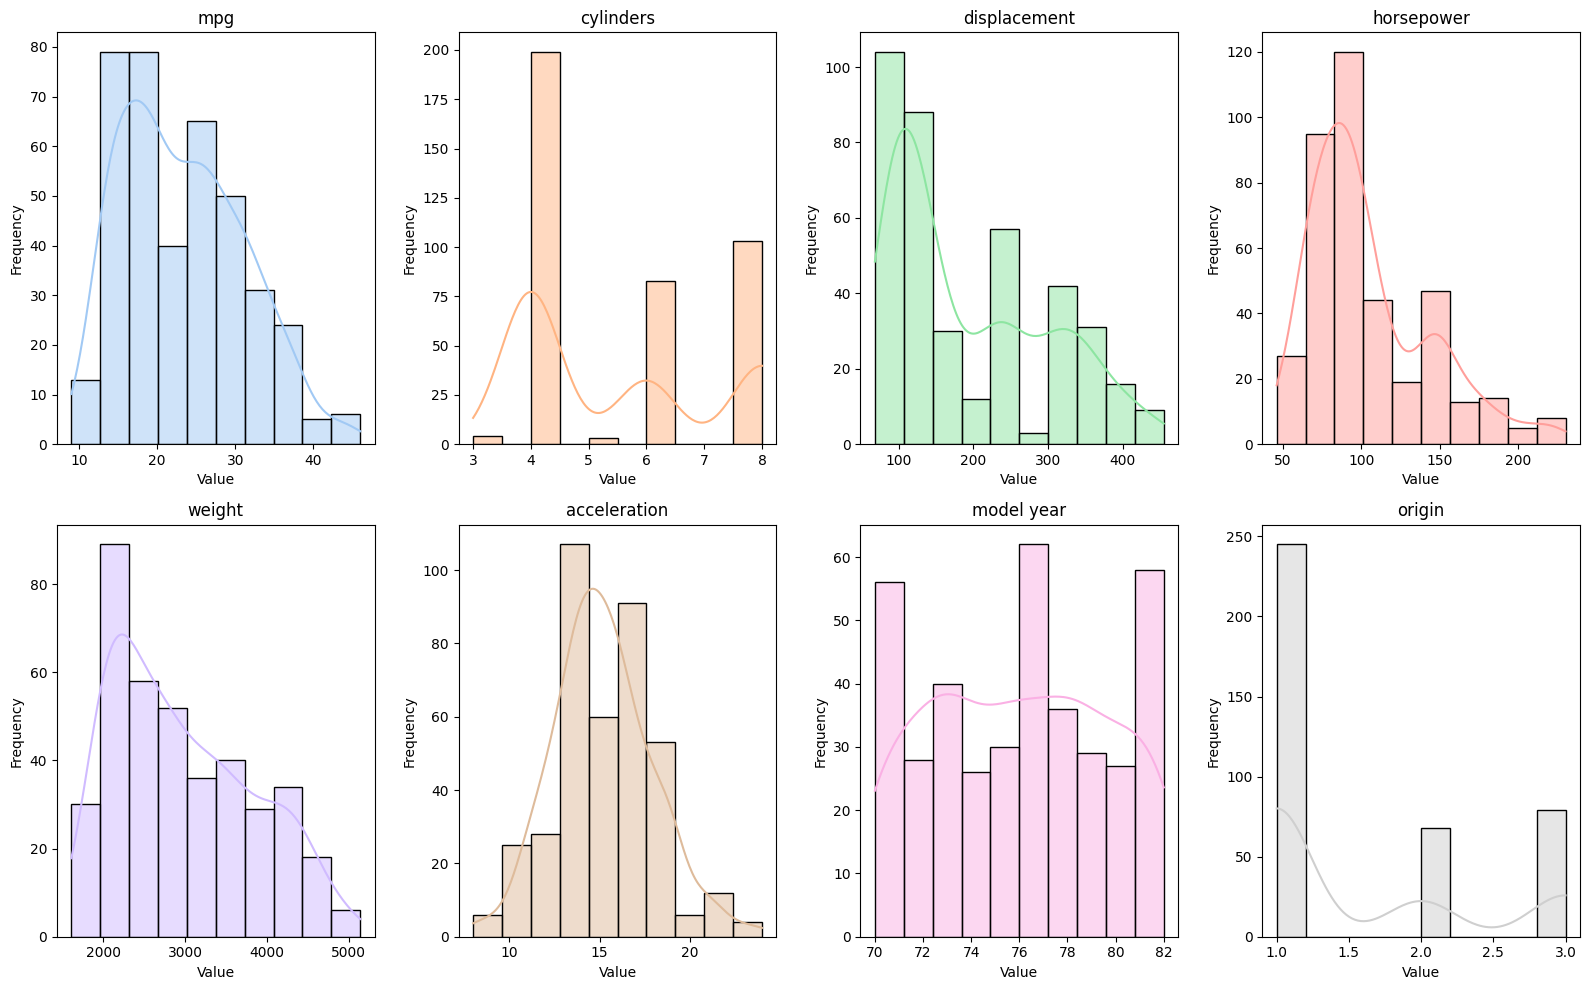

In [8]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 10))

# Define a color palette with different colors for each column
palette = sns.color_palette('pastel', len(df.columns))

# Iterate through each column and plot a histogram with a different color
for i, col in enumerate(df.columns):
    plt.subplot(2, 4, i + 1)
    sns.histplot(df[col], bins=10, kde=True, color=palette[i], edgecolor='black')
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

### Explanation:

1. **Data Loading:** Replace the `data` dictionary with your actual DataFrame `df` if it's already loaded.

2. **Figure Setup:** `plt.figure(figsize=(16, 10))` sets up a figure with a specific size.

3. **Color Palette:** `sns.color_palette('pastel', len(df.columns))` generates a list of colors using the "husl" color palette, which ensures distinct colors for each column.

4. **Iteration and Plotting:** The `for` loop iterates through each column (`col`) in `df.columns`. Inside the loop:
   - `plt.subplot(2, 4, i + 1)` sets up a subplot for each column.
   - `sns.histplot()` is used to plot the histogram. `bins=10` sets the number of bins for the histogram, `kde=True` adds a kernel density estimate curve, `color=palette[i]` assigns a different color from the palette to each histogram, and `edgecolor='black'` sets the edge color of the bars.

5. **Title and Labels:** `plt.title()`, `plt.xlabel()`, and `plt.ylabel()` set the title, x-axis label, and y-axis label for each subplot.

6. **Adjust Layout and Display:** `plt.tight_layout()` adjusts subplot parameters to fit into the figure area, and `plt.show()` displays the plot.

This code will create a figure with histograms for each column in your DataFrame, with each histogram represented in a different color chosen from the "husl" color palette. Adjust the figure size (`figsize`) in `plt.figure()` to suit your preferences.

> Making box plots of the data is another way to visualize the distribution of the data. It provides a summary of the data distribution, including the median, quartiles, and potential outliers.

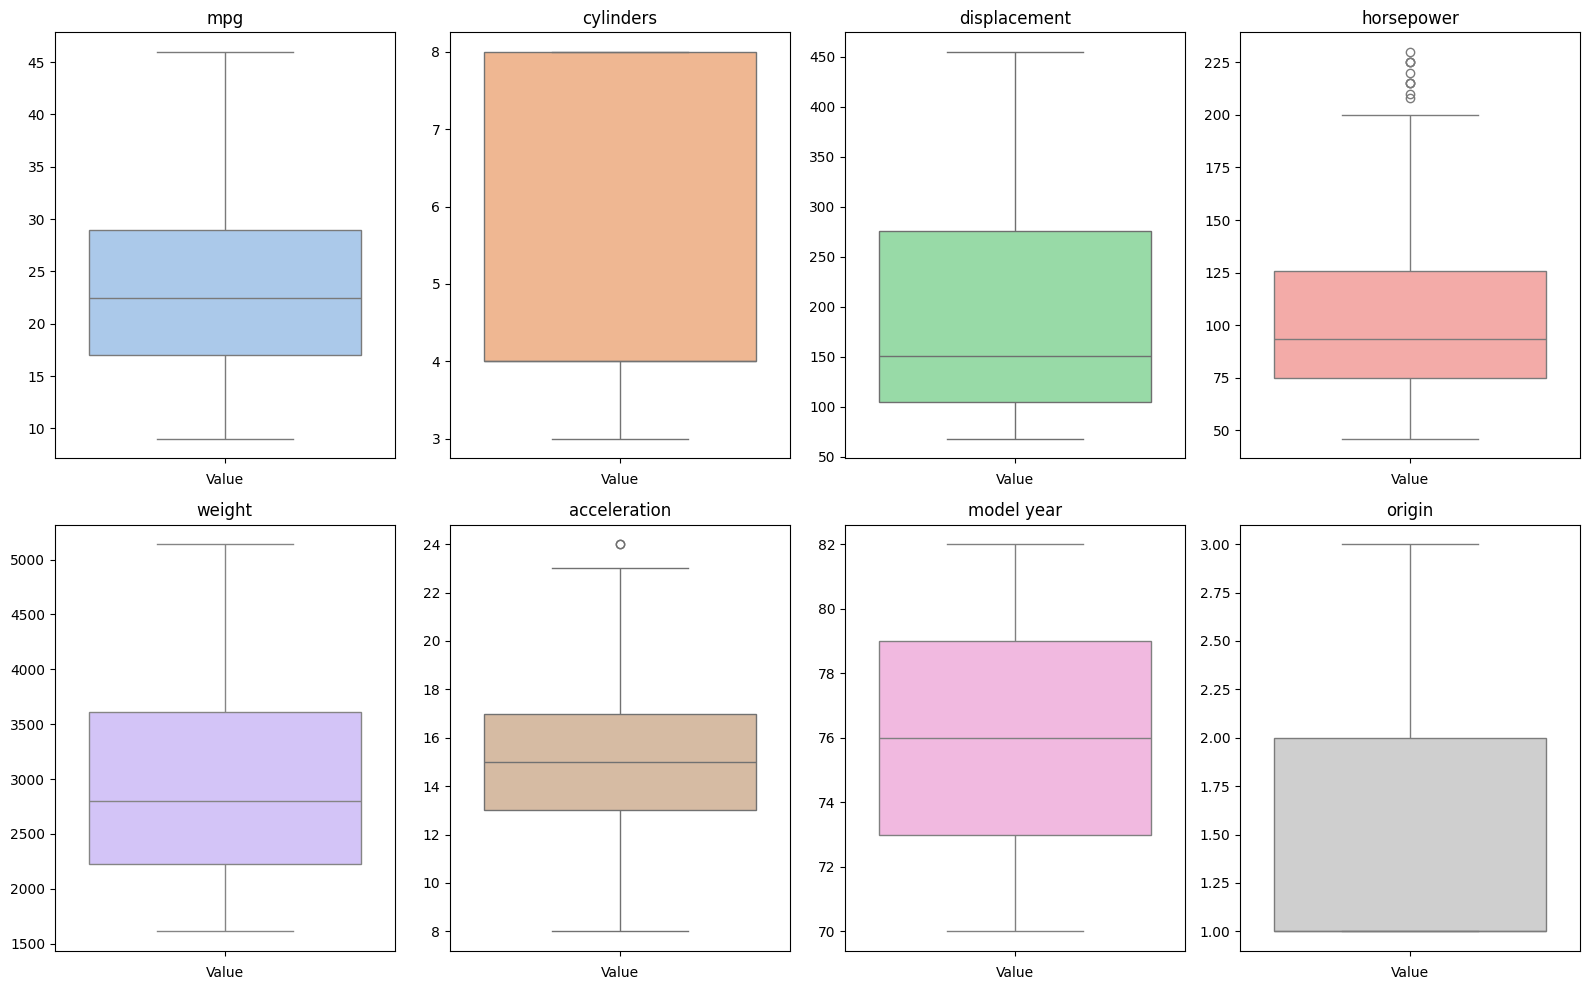

In [9]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 10))

# Define a color palette with different colors for each column
palette = sns.color_palette('pastel', len(df.columns))

# Iterate through each column and plot a boxplot with a different color
for i, col in enumerate(df.columns):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=df[col], color=palette[i])
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()

### Explanation:

1. **Data Loading:** Replace the `data` dictionary with your actual DataFrame `df` if it's already loaded.

2. **Figure Setup:** `plt.figure(figsize=(16, 10))` sets up a figure with a specific size.

3. **Color Palette:** `sns.color_palette('pastel', len(df.columns))` generates a list of colors using the "husl" color palette, ensuring distinct colors for each column.

4. **Iteration and Plotting:** The `for` loop iterates through each column (`col`) in `df.columns`. Inside the loop:
   - `plt.subplot(2, 4, i + 1)` sets up a subplot for each column.
   - `sns.boxplot()` is used to plot the boxplot. `y=df[col]` specifies the column data to plot, and `color=palette[i]` assigns a different color from the palette to each boxplot.

5. **Title and Labels:** `plt.title()`, `plt.xlabel()`, and `plt.ylabel()` set the title, x-axis label, and y-axis label for each subplot.

6. **Adjust Layout and Display:** `plt.tight_layout()` adjusts subplot parameters to fit into the figure area, and `plt.show()` displays the plot.

This code will create a figure with boxplots for each column in your DataFrame, with each boxplot represented in a different color chosen from the "husl" color palette. Adjust the figure size (`figsize`) in `plt.figure()` to suit your preferences.


___
## <span style="color:blue;">Model Development</span>
___


## Lasso Regression
- **Objective:** Fit a Lasso regression model to the training data.
- **Techniques:** Fitting a Lasso regression equation to the observed data points.
- **Usage:** The model is trained on the training data and then used to make predictions on the testing data.

In [10]:
# Splitting the dataset into dependent and independent variables
X = df.drop('mpg', axis=1)
y = df['mpg']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Instantiate the Lasso regression model
lasso = Lasso(alpha=0.1)

# Fit the model to the training data
lasso.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lasso.predict(X_test)

In [11]:
# Calculate coefficients and intercept
coefficients = lasso.coef_
intercept = lasso.intercept_

# Display the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [-0.02575029  0.00923427 -0.006544   -0.00684893  0.13164918  0.70278896
  0.84629635]
Intercept: -14.083137588085371


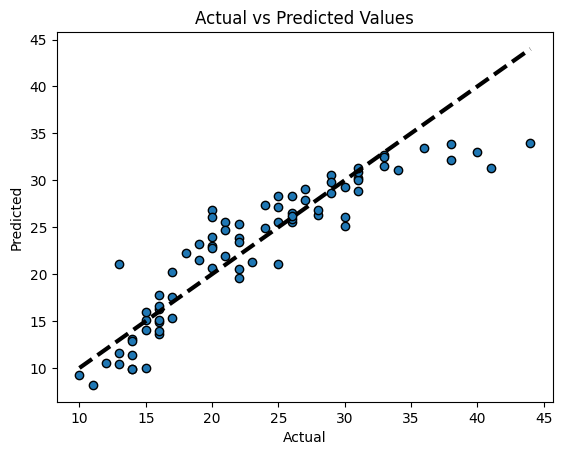

In [12]:
# Plotting predicted values vs actual values
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()


___
## <span style="color:blue;">Model Evaluation</span>
___

## Model Performance Metrics
- **Objective:** Evaluate the performance of the model.
- **Techniques:** Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), R-squared (R²) score.
- **Usage:** Helps in understanding how well the model is performing and making comparisons between models.

### Explanation of Metrics and Analysis

1. **R-squared (R²)**
   - **Information Provided:** Proportion of variance in the dependent variable that is predictable from the independent variable(s). It indicates how well the model explains the variability of the outcome.
   - **Interpretation:** Higher values indicate a better fit.

2. **Mean Squared Error (MSE)**
   - **Information Provided:** Average of the squared differences between predicted and actual values.
   - **Interpretation:** Lower values indicate better model performance.

3. **Mean Absolute Error (MAE)**
   - **Information Provided:** Average of absolute errors between predicted and actual values.
   - **Interpretation:** Lower values indicate better model performance.

4. **Mean Absolute Percentage Error (MAPE)**
   - **Information Provided:** Average of absolute percentage errors between predicted and actual values.
   - **Interpretation:** Lower values indicate better model performance.

5. **Residual Analysis**
   - **Information Provided:** Plot of residuals (differences between predicted and actual values) to assess if residuals are randomly distributed.
   - **Interpretation:** Randomly scattered residuals suggest a good fit; patterns indicate potential issues.

6. **Learning Curves**
   - **Information Provided:** Shows training and validation errors as a function of the number of training samples.
   - **Interpretation:** Helps diagnose if the model is overfitting or underfitting.

7. **Validation Curves**
   - **Information Provided:** Shows training and validation errors as a function of a hyperparameter (e.g., whether to fit intercept).
   - **Interpretation:** Helps determine the optimal value for the hyperparameter.

In [13]:
# Evaluating the model using the metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('R2 Score:', r2)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)


R2 Score: 0.8277605200970978
Mean Absolute Error: 2.428002280833526
Mean Squared Error: 10.436260824265707
Root Mean Squared Error: 3.2305202095429935


### Correlation Analysis
- **Objective:** Examine the strength and direction of the relationship between two or more continuous variables.
- **Techniques:** Pearson correlation coefficient, scatter plots.
- **Usage:** Helps in understanding the linear relationship between variables and identifying potential predictors.

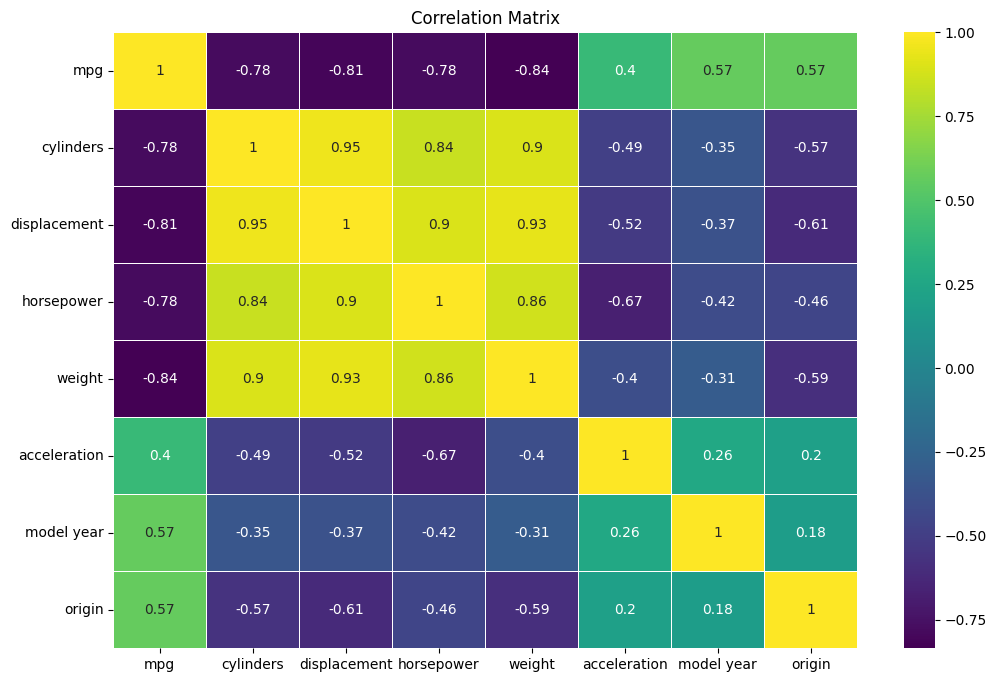

In [14]:
# correlation calculation
correlation = df.corr()
correlation['mpg'].sort_values(ascending=False)

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Residual Analysis
- **Objective:** Evaluate the model's assumptions and check for patterns in the residuals.
- **Techniques:** Residual plots, QQ plots.
- **Usage:** Helps in identifying any violations of the model's assumptions and improving the model.

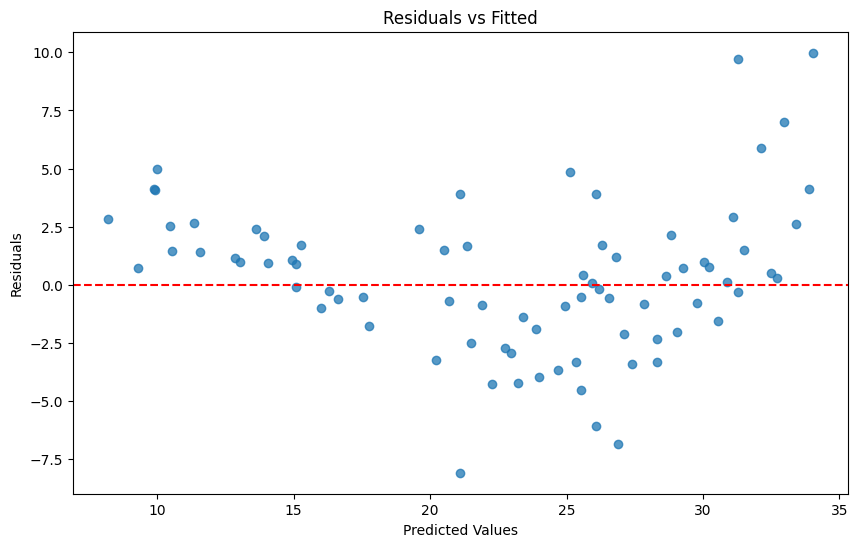

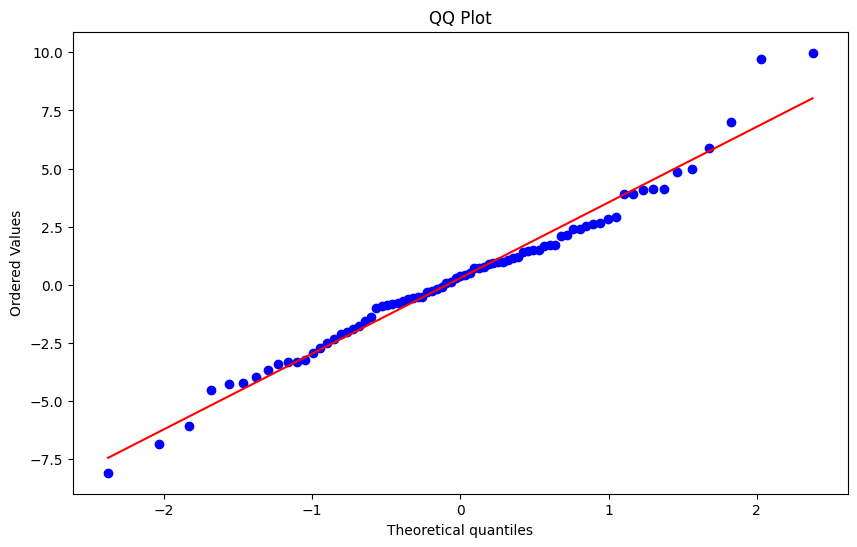

In [15]:
# Residual analysis
residuals = y_test - y_pred

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.75)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Fitted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# QQ plot
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot')
plt.show()


### Learning Curves
- **Objective:** Evaluate the performance of the model as a function of the training set size.
- **Techniques:** Plot training and validation error versus training set size.
- **Usage:** Helps in diagnosing whether the model is underfitting or overfitting.

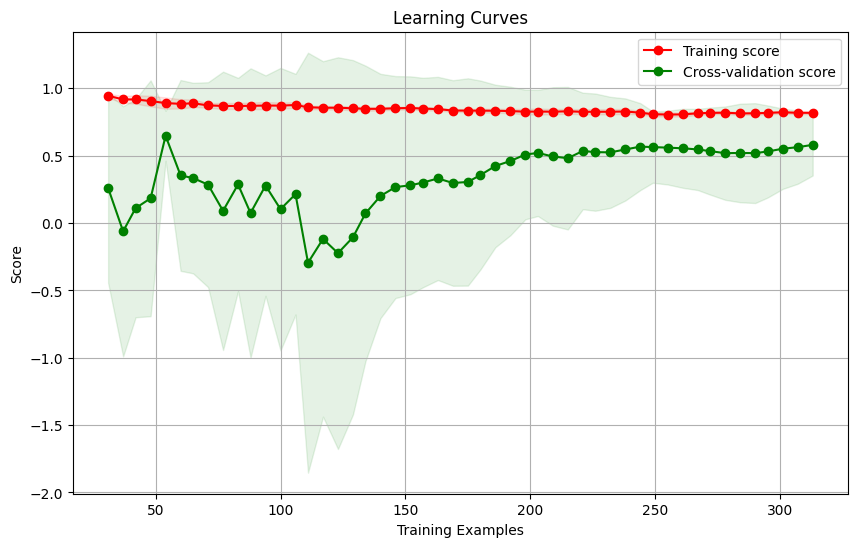

In [16]:
# Plotting Learning Curves
train_sizes, train_scores, validation_scores = learning_curve(lasso, X, y, train_sizes=np.linspace(0.1, 1.0, 50), cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(validation_scores, axis=1)
valid_std = np.std(validation_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, valid_mean, 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.1)
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, color="g", alpha=0.1)
plt.title('Learning Curves')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.legend(loc="best")
plt.grid()
plt.show()


### Validation Curves
- **Objective:** Evaluate the performance of the model as a function of a hyperparameter.
- **Techniques:** Plot training and validation error versus hyperparameter values.
- **Usage:** Helps in identifying the optimal value of the hyperparameter.

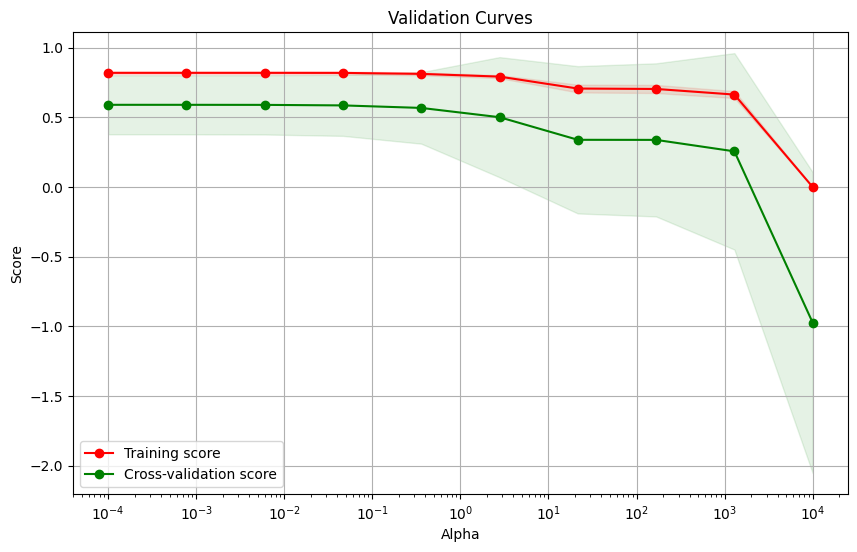

In [17]:
# Plotting Validation Curves
param_range = np.logspace(-4, 4, 10)
train_scores, validation_scores = validation_curve(lasso, X, y, param_name='alpha', param_range=param_range, cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(validation_scores, axis=1)
valid_std = np.std(validation_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mean, 'o-', color="r", label="Training score")
plt.plot(param_range, valid_mean, 'o-', color="g", label="Cross-validation score")
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="r", alpha=0.1)
plt.fill_between(param_range, valid_mean - valid_std, valid_mean + valid_std, color="g", alpha=0.1)
plt.title('Validation Curves')
plt.xlabel('Alpha')
plt.ylabel('Score')
plt.legend(loc="best")
plt.xscale('log')
plt.grid()
plt.show()


___
## <span style="color:blue;">SAMPLE TESTING</span>

___


In [18]:
# Sample Test
sample = np.array([6,307, 130, 3504, 12, 70, 1]) # [cylinders, displacement, horsepower, weight, acceleration, model year, origin]
sample = sample.reshape(1, -1)
sample_pred = lasso.predict(sample)
sample_pred  # mpg

c:\Users\Ahmad\anaconda3\envs\NLP\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([15.3692164])

___
## <span style="color:blue;">CONCLUSION</span>

___

### Summary of Findings

- **Relationship Between Predictors and Performance**: The Lasso regression analysis confirmed significant relationships between various predictors (cylinders, displacement, horsepower, weight, acceleration, model year, and origin) and the miles per gallon (mpg) performance of cars. The model illustrates how each factor contributes to fuel efficiency.
  
- **Model Performance**: The Lasso Regression model performed well, achieving an R-squared score of approximately 0.828. This indicates that 82.8% of the variance in the mpg can be explained by the predictor variables.
  
- **Model Evaluation**: Evaluation metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) were calculated to be low, specifically MAE = 2.428, MSE = 10.436, and RMSE = 3.231. These values suggest that the model predicts mpg with a reasonable degree of accuracy.

### Insights

- **Data Distribution**: The dataset exhibited a normal distribution for key variables, with histograms and box plots confirming the spread and central tendency. Proper data preprocessing ensured the reliability of the model by addressing missing values and outliers.

- **Model Robustness**: Cross-validation, learning curves, and residual analyses demonstrated the model's robust performance, indicating its reliability in predicting mpg based on the given predictors across different subsets of data.

### Recommendations

- **Feature Engineering**: Further exploration into additional features such as car brand, fuel type, or maintenance history could potentially enhance the model's predictive power.

- **Advanced Techniques**: Consider applying more sophisticated regression techniques or ensemble methods to further optimize model accuracy and generalize its applicability.

- **Deployment**: Prepare the model for deployment in practical scenarios, ensuring scalability and adaptation to new data inputs effectively.

### Final Thoughts

- The findings underscore the practical relevance of Lasso Regression in predicting fuel efficiency outcomes based on various car specifications, offering valuable insights for automotive engineers, manufacturers, and policymakers.

- Continued exploration and collaboration in refining the model could yield enhanced predictive capabilities and broader application in related fields.

### Acknowledgements

- **Data Source**: [UCI Machine Learning Repository.](https://archive.ics.uci.edu/ml/datasets/auto+mpg)
  
- **Libraries**: Utilized numpy, pandas, matplotlib, seaborn, and scikit-learn for data analysis, visualization, and modeling.

### Contact Information

- For further inquiries or collaborations, please contact ahmadbinsadiq@gmail.com.

### References

- [Dataset: Auto-Mpg Data from the UCI Machine Learning Repository.](https://archive.ics.uci.edu/ml/datasets/auto+mpg)
